-----------------------------------Problem 1-------------------------------------


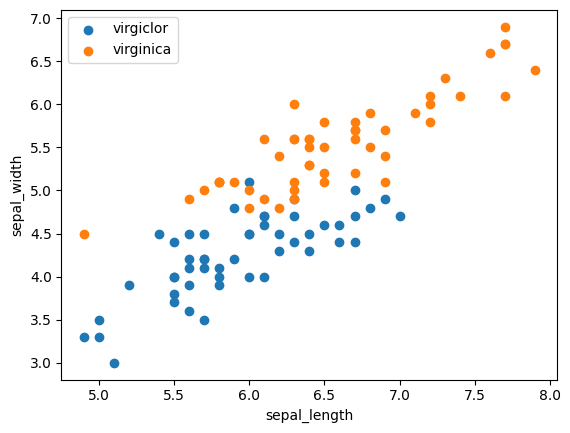

-----------------------------------Problem 2-------------------------------------


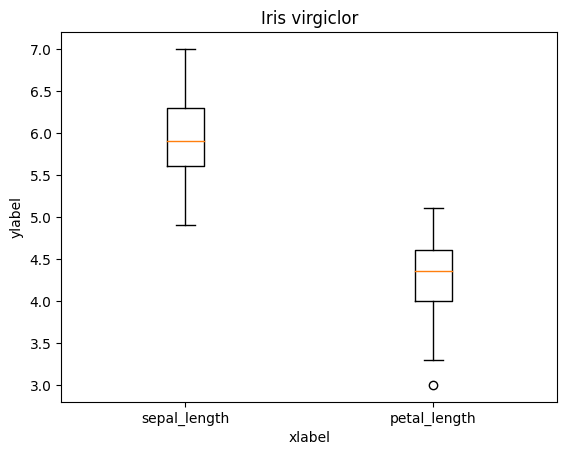

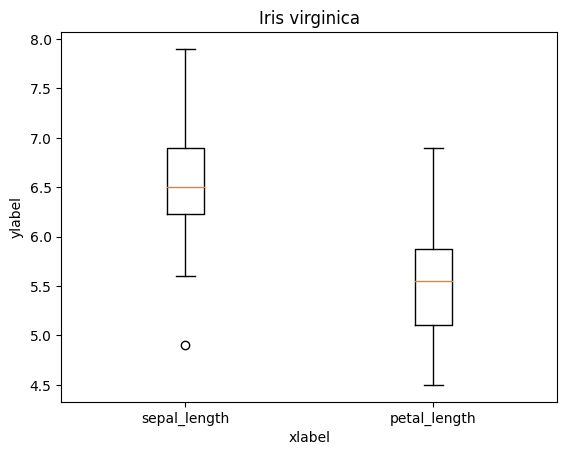

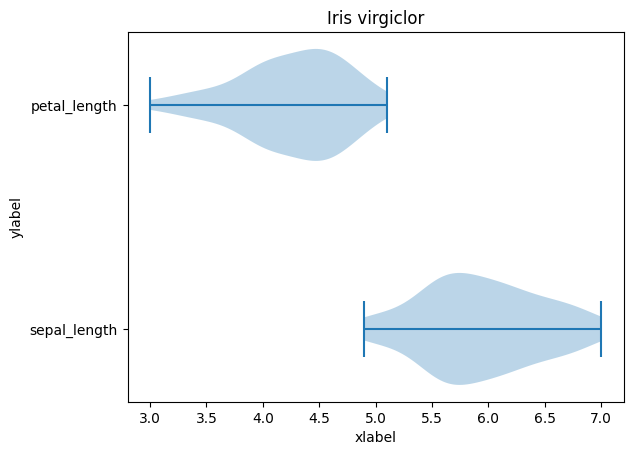

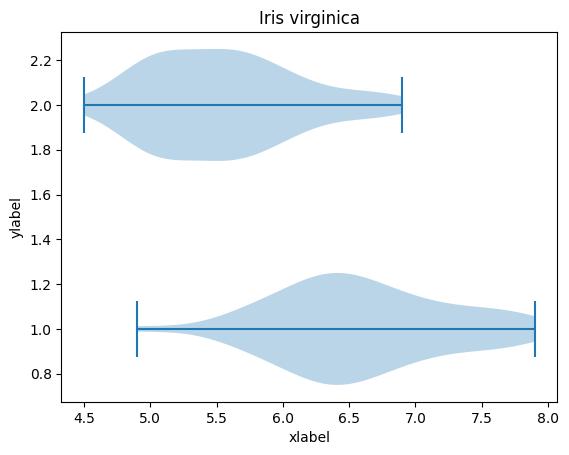

-----------------------------------Problem 3-------------------------------------
How split: 

X train (112, 4)
y train (112, 1)
X test (38, 4)
y test (38, 1)
-----------------------------------Problem 4-------------------------------------
[[-0.18244103 -1.33464146  0.69633708  1.04067456]
 [-1.0140327   0.76087037 -1.25619607 -1.29043645]
 [-0.89523389  0.99370501 -1.31198273 -1.29043645]
 [-1.25163032  0.76087037 -1.20040941 -1.29043645]
 [-1.0140327  -1.80031075 -0.25203617 -0.25438711]
 [-1.0140327   0.52803572 -1.31198273 -1.29043645]
 [-0.18244103 -0.63613752  0.19425712  0.13413139]
 [-1.13283151 -1.33464146  0.41740377  0.65215605]
 [-1.25163032 -0.17046822 -1.31198273 -1.41994262]
 [ 0.29275421 -0.17046822  0.47319043  0.26363755]
 [ 1.71833993 -0.40330287  1.42156367  0.78166222]
 [ 0.29275421 -0.17046822  0.64055041  0.78166222]
 [-0.30123984 -0.63613752  0.64055041  1.04067456]
 [ 0.76794945 -0.63613752  0.47319043  0.39314372]
 [ 1.12434588 -0.17046822  0.97527038  1.1701

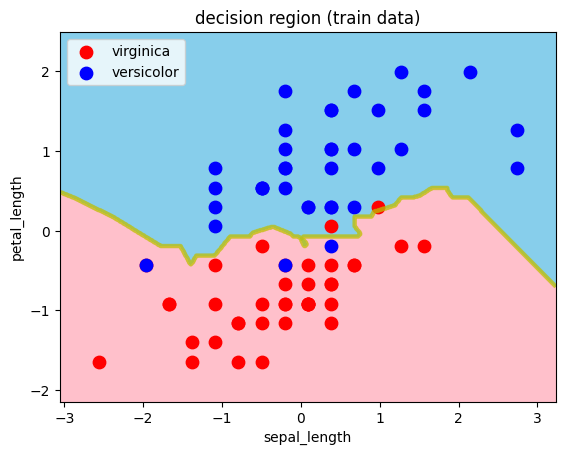

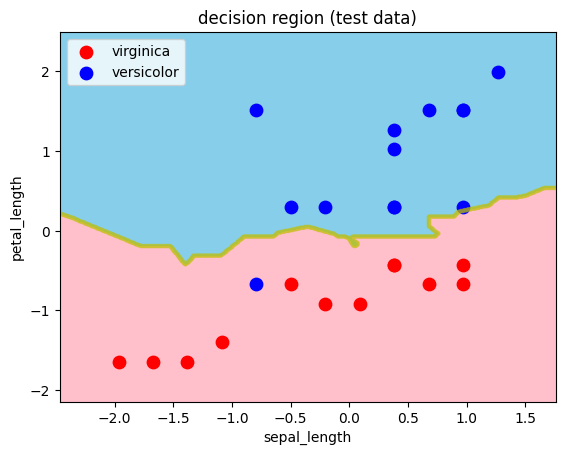

-----------------------------------Problem 8-------------------------------------
Nearest neighbor method with standardization
n_neighbors=5
0.96
Logistic regression method with standardization
0.92
SVM method with standardization
0.92
Decision tree method with standardization
0.9733333333333334
Random forest method with standardization
0.9333333333333333
-----------------------------------Problem 9-------------------------------------
Nearest neighbor method without standardization
n_neighbors=5
0.96
Logistic regression method without standardization
0.9066666666666666
SVM method without standardization
0.92
Decision tree method without standardization
0.9733333333333334
Random forest method without standardization
0.9466666666666667
-----------------------------------Problem 10------------------------------------
Nearest neighbor method with standardization & using all objective variables
n_neighbors=5
1.0


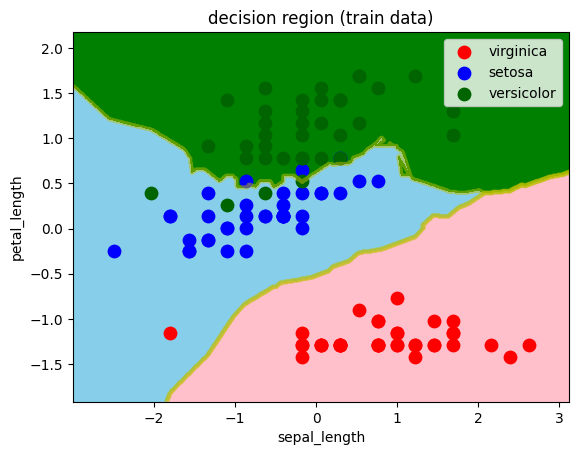

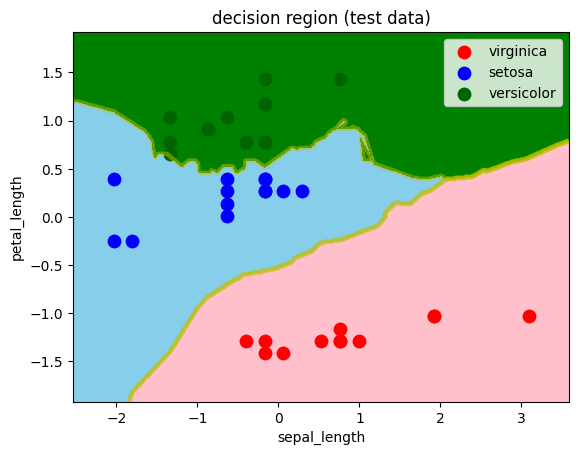

Logistic regression method with standardization & using all objective variables
0.9375


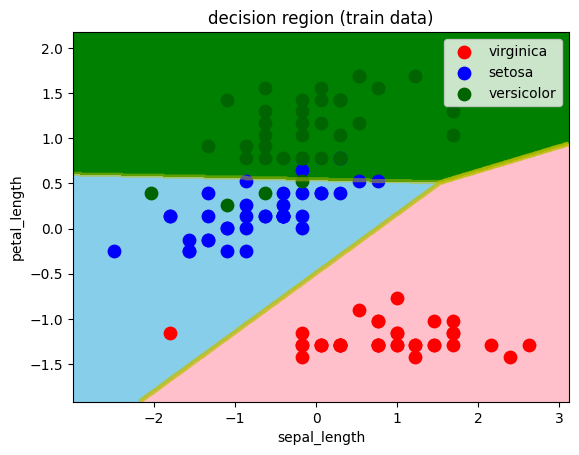

SVM method with standardization & using all objective variables
0.9285714285714286


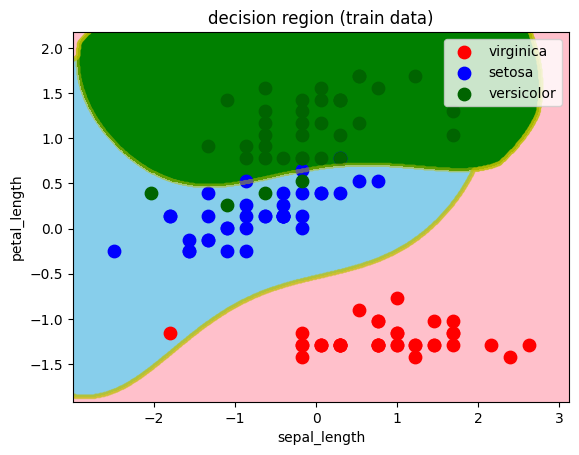

Decision tree method with standardization & using all objective variables
0.9910714285714286


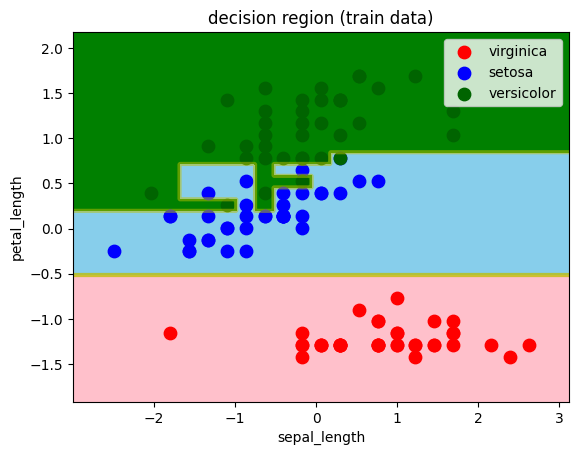

Random forest method with standardization & using all objective variables
0.9285714285714286


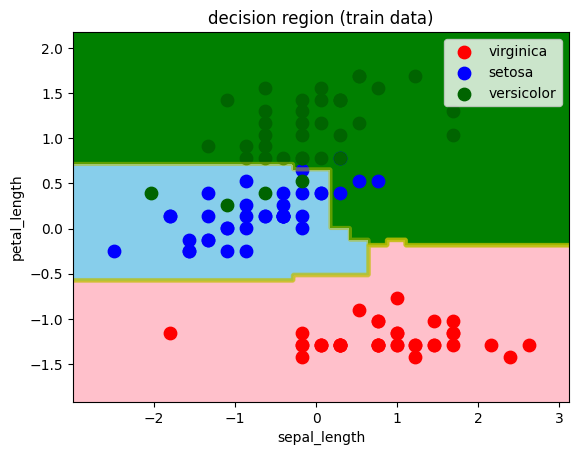

In [157]:
# Purpose of the Assignment
# Get an overview of supervised learning (classification problems)
# Use scikit-learn to perform classification.
# Make a brief comparison of the methods.

# Note: When there are two types of classification targets, 
#       we call it binary classification and distinguish it from multi-level classification.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn import metrics
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# [Problem 1] Select features and categories for practice
# -------------------------------------------------------

# After retrieving the iris data set, extract these from the data frame.
# - virgicolor and virginica
# - sepal_length and petal_length
print('-----------------------------------Problem 1-------------------------------------')
iris = load_iris()
# X is the explanatory variable
# Y is the objective variable
Xt, yt = iris.data, iris.target 
X = pd.DataFrame(Xt, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(yt, columns = ['Species'])
frames = [X, Y]
df = pd.concat(frames, axis = 1)
df1 = df.loc[df.Species == 1] # Iris virgiclor
df2 = df.loc[df.Species == 2] # Iris virginica
plt.scatter(df1[['sepal_length']],df1[['petal_length']])
plt.scatter(df2[['sepal_length']],df2[['petal_length']])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(['virgiclor', 'virginica'])
plt.show() 

# [Problem 2] Data analysis 
# -------------------------
# For the sake of review, display a scatter plot of the extracted data, a boxplot, and a violinplot.
print('-----------------------------------Problem 2-------------------------------------')
irislabels = ['sepal_length','petal_length']
plt.boxplot(df1[['sepal_length','petal_length']], labels = irislabels)
plt.title('Iris virgiclor')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show() 

plt.boxplot(df2[['sepal_length','petal_length']], labels = irislabels)
plt.title('Iris virginica')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show() 

plt.figure()
ax = plt.subplot(111)
pos   = [1, 2]
plt.violinplot(df1[['sepal_length','petal_length']],pos, vert=False)
plt.title('Iris virgiclor')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
ax.set_yticks(pos)
ax.set_yticklabels(irislabels)
plt.show() 

plt.violinplot(df2[['sepal_length','petal_length']],pos, vert=False)
plt.title('Iris virginica')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show() 

# [Problem 3] Division of preprocessing/training data and verification data
# -------------------------------------------------------------------------
print('-----------------------------------Problem 3-------------------------------------')
# 75% of the data will be the training data, and 25% will be the test data to verify our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify = y)
print('How split: \n')
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

# [Problem 4] Pretreatment/Standardization 
# ----------------------------------------
print('-----------------------------------Problem 4-------------------------------------')
# This puts the X values on a standard scale for all features, while keeping the scale of differences between the values.

#scaler = StandardScaler()
#X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
#print(X_test)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

# [Problem 5] Learning and estimation & [Problem 6] Evaluation
# ------------------------------------------------------------
print('-----------------------------------Problem 5 & 6-----------------------------------')
scores = {}
scores_list = []
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)
scores = metrics.accuracy_score(y_test,y_pred)
scores_list.append(metrics.accuracy_score(y_test,y_pred))
print('n_neighbors=1')
print(scores)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)
scores = metrics.accuracy_score(y_test,y_pred)
scores_list.append(metrics.accuracy_score(y_test,y_pred))
print('n_neighbors=3')
print(scores)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)
scores = metrics.accuracy_score(y_test,y_pred)
scores_list.append(metrics.accuracy_score(y_test,y_pred))
print('n_neighbors=5')
print(scores)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)


#  [Problem 7] Visualization 
# --------------------------
print('-----------------------------------Problem 7-------------------------------------')

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = [ 'blue','red']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
            plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i-1], label=target_names[i-1], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

Xt2 = iris.data[:, range(1, 4, 2)]  # we only take the first two features.
yt2 = iris.target
X2 = pd.DataFrame(Xt2, columns = ['sepal_length','petal_length'])
y2 = pd.DataFrame(yt2, columns = ['Species'])
frames2 = [X2, y2]
df2 = pd.concat(frames2, axis = 1)
DelSetosa = df[(df2['Species'] == 0)].index
df2.drop(DelSetosa, inplace=True)
X2n = df2.iloc[:,0:2]
print(X2n)
y2n = df2.iloc[:,2]
print(y2n)
print(df2.shape)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2n, y2n, test_size=0.25, random_state=1, stratify = y2n)

print('X train', X2_train.shape)
print('y train', y2_train.shape)
print('X test', X2_test.shape)
print('y test', y2_test.shape)

scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X2_train, y2_train.values.ravel())
y2_pred = classifier.predict(X2_test)

decision_region(X2_train, y2_train.values.ravel(), classifier, step=0.01, title='decision region (train data)', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])
decision_region(X2_test, y2_test.values.ravel(), classifier, step=0.01, title='decision region (test data)', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])


#  [Problem 8] Learning by other methods 
# --------------------------------------
print('-----------------------------------Problem 8-------------------------------------')

# Nearest neighbor method
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X2_train, y2_train.values.ravel())
y2_pred = classifier.predict(X2_test)
scores = metrics.accuracy_score(y2_test,y2_pred)
scores_list.append(metrics.accuracy_score(y2_test,y2_pred))
print('Nearest neighbor method with standardization')
print('n_neighbors=5')
print(scores)

# Logistic regression
clf = LogisticRegression(random_state=0).fit(X2_test, y2_test)
clf.predict(X2_train)
clf.predict_proba(X2_train)
print('Logistic regression method with standardization')
print(clf.score(X2_train, y2_train))

# SVM
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X2_test, y2_test)
clf.predict(X2_train)
print('SVM method with standardization')
print(clf.score(X2_train, y2_train, sample_weight=None))

# Decision tree
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X2_train, y2_train, cv=10)
clf.fit(X2_train, y2_train, sample_weight=None, check_input=True)
print('Decision tree method with standardization')
print(clf.score(X2_train, y2_train, sample_weight=None))

# Random forest
X2_test, y2_test = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X2_train, y2_train)
print('Random forest method with standardization')
print(clf.score(X2_train, y2_train, sample_weight=None))


# [Problem 9] (Advanced task) Comparison with and without standardization
# -----------------------------------------------------------------------
print('-----------------------------------Problem 9-------------------------------------')
X2_train, X2_test, y2_train, y2_test = train_test_split(X2n, y2n, test_size=0.25, random_state=1, stratify = y2n)
# Nearest neighbor method
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X2_train, y2_train.values.ravel())
y2_pred = classifier.predict(X2_test)
scores = metrics.accuracy_score(y2_test,y2_pred)
scores_list.append(metrics.accuracy_score(y2_test,y2_pred))
print('Nearest neighbor method without standardization')
print('n_neighbors=5')
print(scores)


# Logistic regression
clf = LogisticRegression(random_state=0).fit(X2_test, y2_test)
clf.predict(X2_train)
clf.predict_proba(X2_train)
print('Logistic regression method without standardization')
print(clf.score(X2_train, y2_train))


# SVM
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X2_test, y2_test)
clf.predict(X2_train)
print('SVM method without standardization')
print(clf.score(X2_train, y2_train, sample_weight=None))


# Decision tree
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X2_train, y2_train, cv=10)
clf.fit(X2_train, y2_train, sample_weight=None, check_input=True)
print('Decision tree method without standardization')
print(clf.score(X2_train, y2_train, sample_weight=None))


# Random forest
X2_test, y2_test = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X2_train, y2_train)
print('Random forest method without standardization')
print(clf.score(X2_train, y2_train, sample_weight=None))

# [Problem 10] (Advance assignment) Highly accurate method using all objective variables
# --------------------------------------------------------------------------------------
print('-----------------------------------Problem 10------------------------------------')
def decision_region3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['blue','darkgreen','red']
    contourf_color = ['pink', 'skyblue', 'green']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
            plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i-1], label=target_names[i-1], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

Xt3 = iris.data[:, range(1, 4, 2)]  # we only take the first two features.
yt3 = iris.target
X3 = pd.DataFrame(Xt2, columns = ['sepal_length','petal_length'])
y3 = pd.DataFrame(yt2, columns = ['Species'])
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=1, stratify = y3)

scaler = StandardScaler()
scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

# Nearest neighbor method
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X3_train, y3_train.values.ravel())
y3_pred = classifier.predict(X3_test)
scores = metrics.accuracy_score(y3_test,y3_pred)
scores_list.append(metrics.accuracy_score(y3_test,y3_pred))
print('Nearest neighbor method with standardization & using all objective variables')
print('n_neighbors=5')
print(scores)
decision_region3(X3_train, y3_train.values.ravel(), classifier, step=0.01, title='decision region (train data)', xlabel='sepal_length', ylabel='petal_length', target_names=['setosa','versicolor', 'virginica'])
decision_region3(X3_test, y3_test.values.ravel(), classifier, step=0.01, title='decision region (test data)', xlabel='sepal_length', ylabel='petal_length', target_names=['setosa','versicolor', 'virginica'])


# Logistic regression
clf = LogisticRegression(random_state=0).fit(X3_test, y3_test.values.ravel())
clf.predict(X3_train)
clf.predict_proba(X3_train)
print('Logistic regression method with standardization & using all objective variables')
print(clf.score(X3_train, y3_train))
decision_region3(X3_train, y3_train.values.ravel(), clf, step=0.01, title='decision region (train data)', xlabel='sepal_length', ylabel='petal_length', target_names=['setosa','versicolor', 'virginica'])


# SVM
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X3_test, y3_test.values.ravel())
clf.predict(X3_train)
print('SVM method with standardization & using all objective variables')
print(clf.score(X3_train, y3_train, sample_weight=None))
decision_region3(X3_train, y3_train.values.ravel(), clf, step=0.01, title='decision region (train data)', xlabel='sepal_length', ylabel='petal_length', target_names=['setosa','versicolor', 'virginica'])

# Decision tree
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X3_train, y3_train, cv=10)
clf.fit(X3_train, y3_train.values.ravel(), sample_weight=None, check_input=True)
print('Decision tree method with standardization & using all objective variables')
print(clf.score(X3_train, y3_train, sample_weight=None))
decision_region3(X3_train, y3_train.values.ravel(), clf, step=0.01, title='decision region (train data)', xlabel='sepal_length', ylabel='petal_length', target_names=['setosa','versicolor', 'virginica'])

# Random forest
X3_test, y3_test = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X3_train, y3_train.values.ravel())
print('Random forest method with standardization & using all objective variables')
print(clf.score(X3_train, y3_train, sample_weight=None))
decision_region3(X3_train, y3_train.values.ravel(), clf, step=0.01, title='decision region (train data)', xlabel='sepal_length', ylabel='petal_length', target_names=['setosa','versicolor', 'virginica'])



